<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M3_exercise_solution/ex4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generate synthetic image with random blobs

<ipython-input-16-c5f852d02107>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image) # visualize image using imshow function
<ipython-input-16-c5f852d02107>:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


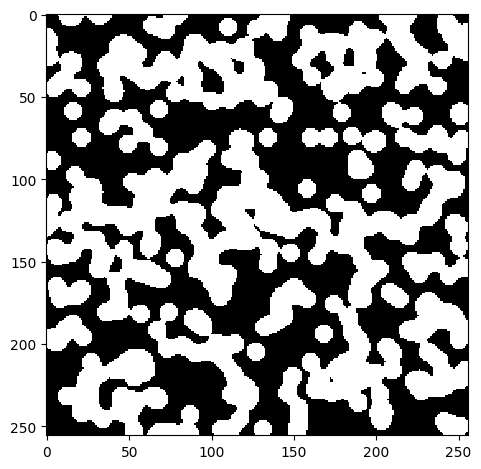

In [16]:
from skimage import data
import numpy as np
from skimage import data, io, morphology
import matplotlib.pyplot as plt

data.binary_blobs(length=5, blob_size_fraction=0.2)
np.array([[ True, False,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [False,  True, False,  True,  True],
       [ True, False, False,  True,  True],
       [ True, False, False, False,  True]])
image = data.binary_blobs(length=256, blob_size_fraction=0.05)

io.imshow(image) # visualize image using imshow function
io.show()

2. Object segmentation and labeling


*   Segmentation of blobs using Otsu's optimal threshold
*   Labeling connected regions
*   Visualization

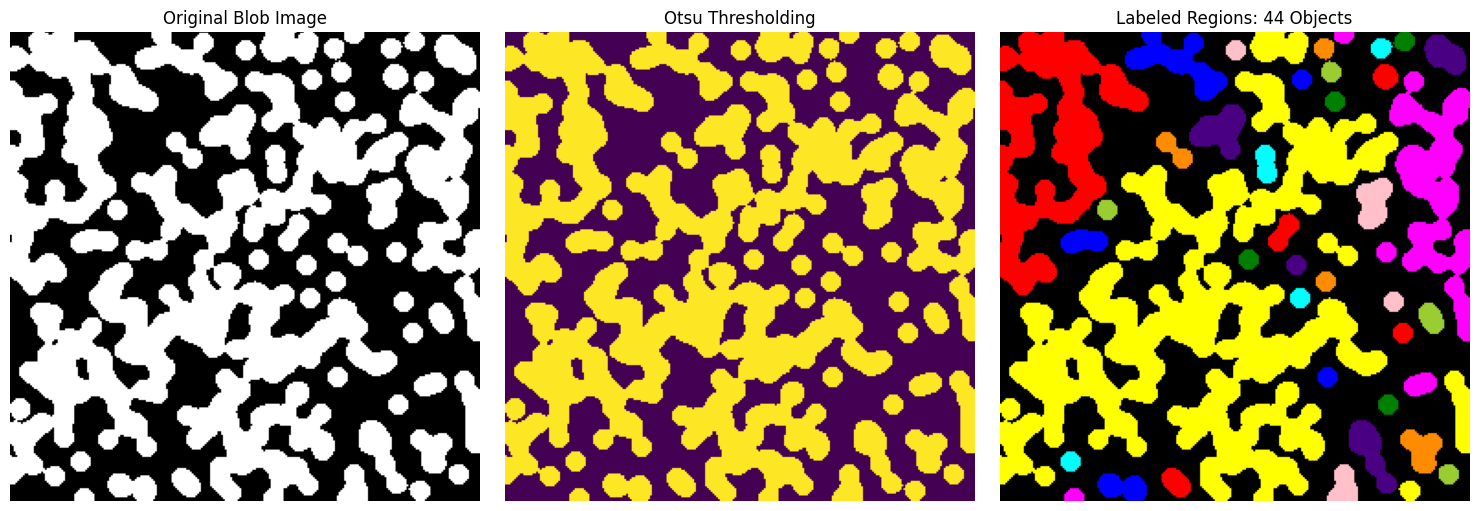

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, color, morphology
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Apply Otsu's threshold to segment the blobs
thresh = threshold_otsu(image)
binary = image > thresh

# Label connected components
labeled_image = measure.label(binary, connectivity=2)

# Apply a colormap to the labeled image
colored_labels = color.label2rgb(labeled_image, bg_label=0)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Blob Image")
axes[0].axis('off')

axes[1].imshow(binary)
axes[1].set_title("Otsu Thresholding")
axes[1].axis('off')

axes[2].imshow(colored_labels)
axes[2].set_title(f"Labeled Regions: {labeled_image.max()} Objects")
axes[2].axis('off')

plt.tight_layout()
plt.show()



3. Get regional properties in a pandas dataframe

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, filters, measure, color

# Step 1: Generate synthetic image with blobs
image = data.binary_blobs(length=256, blob_size_fraction=0.05, n_dim=2).astype(float)

# Step 2: Segment using Otsu threshold
threshold = filters.threshold_otsu(image)
binary = image > threshold

# Step 3: Label connected regions
labeled_image = measure.label(binary, connectivity=2)

# Step 4: Extract region properties into a DataFrame
properties = ['label', 'area', 'eccentricity', 'extent' ,	'axis_major_length']
region_props = measure.regionprops_table(labeled_image, properties=properties)

df = pd.DataFrame(region_props)

# Display first few rows
print(df.head())


   label    area  eccentricity    extent  axis_major_length
0      1   450.0      0.898390  0.573980          37.484456
1      2  6169.0      0.956869  0.389432         227.435589
2      3   278.0      0.943034  0.702020          34.260064
3      4    60.0      0.749441  0.857143          10.960073
4      5    97.0      0.000000  0.801653          11.092860


Represent area of the blobs as a function of the major axis length

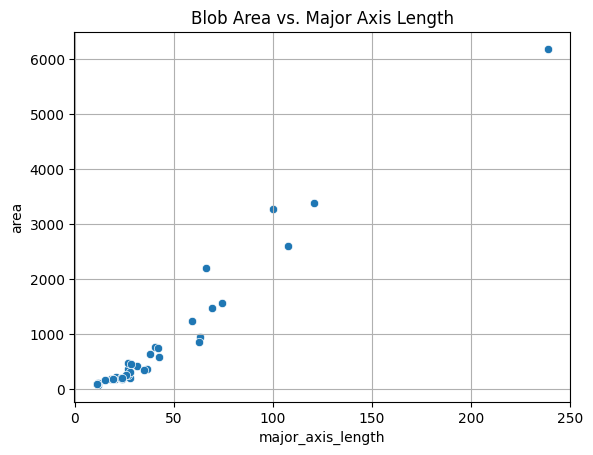

In [13]:
import seaborn as sns

sns.scatterplot(x='major_axis_length',y='area',data=df)
plt.title('Blob Area vs. Major Axis Length')
plt.grid('true')



4. Analyze blobs: How many blobs have an area above the average?


In [35]:
labeled_blobs = measure.label(image)

properties = ['label', 'area', 'eccentricity', 'extent', 'axis_major_length']
region_props = measure.regionprops_table(labeled_blobs, properties=properties)

df = pd.DataFrame(region_props)

# Mean area
mean_area = df['area'].mean()

# Count blobs
num_large_blobs = (df['area'] > mean_area).sum()
num_small_blobs = (df['area'] <= mean_area).sum()

large_blobs = df[df['area'] > mean_area]

print(f"Number of large blobs (area > average): {num_large_blobs}")
print(f"Number of small blobs (area <= average): {num_small_blobs}")
print(f"Mean Area: {mean_area}")

# Display properties of large blobs
print("\nProperties of large blobs:")
print(large_blobs)


Number of large blobs (area > average): 7
Number of small blobs (area <= average): 29
Mean Area: 910.2222222222222

Properties of large blobs:
    label     area  eccentricity    extent  axis_major_length
1       2   6169.0      0.956869  0.389432         227.435589
11     12   1373.0      0.626575  0.683425          51.772451
13     14  12946.0      0.942722  0.274722         302.397576
14     15   1641.0      0.835286  0.430935          78.539465
21     22   1349.0      0.755466  0.468403          58.110329
31     32   1251.0      0.615473  0.472789          54.325797
32     33   1197.0      0.738408  0.456522          57.489828


Represent the blobs that have an area smaller than the average blob's area

In [36]:
# Find labels
large_labels = df.loc[df['area'] > mean_area].index + 1  # regionprops labels start from 1
small_labels = df.loc[df['area'] <= mean_area].index + 1

print(f"Large blob labels: {large_labels.tolist()}")
print(f"Small blob labels: {small_labels.tolist()}")


Large blob labels: [2, 12, 14, 15, 22, 32, 33]
Small blob labels: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36]


Create a binary mask with the large and small blobs

In [37]:
# Masks
large_mask = np.isin(labeled_blobs, large_labels)
small_mask = np.isin(labeled_blobs, small_labels)


Represent the large and small blobs

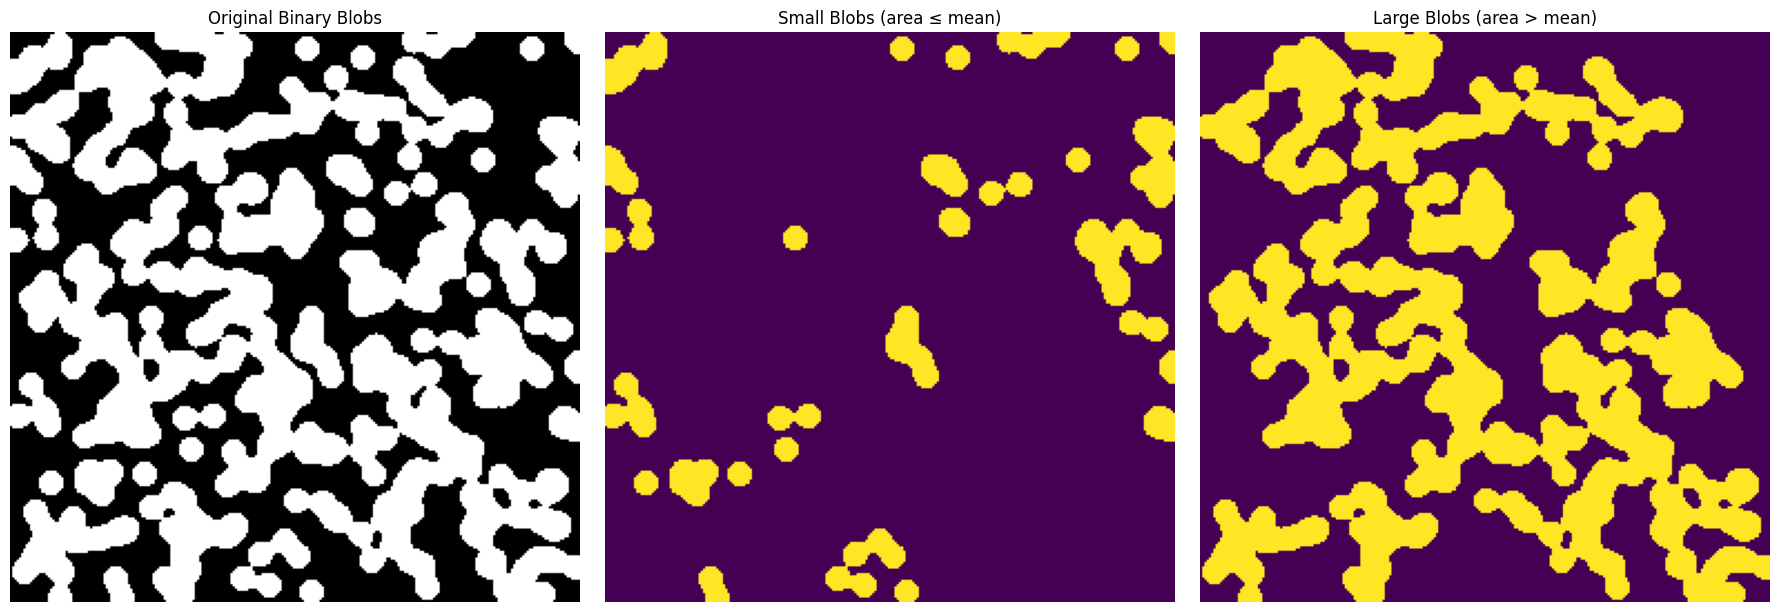

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original binary blob image
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original Binary Blobs')
axes[0].axis('off')

# Small blobs mask
axes[1].imshow(small_mask)
axes[1].set_title('Small Blobs (area ≤ mean)')
axes[1].axis('off')

# Large blobs mask
axes[2].imshow(large_mask)
axes[2].set_title('Large Blobs (area > mean)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

5. Obtain texture-based regional properties

In [45]:
# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

glcm = feature.graycomatrix(image_int, distances=[1], angles=[0], levels=2, symmetric=False, normed=False)

# 3. Print co-occurrence counts
print("GLCM Matrix for binary blobs (gray levels 0 and 1):\n")
for i in range(2):
    for j in range(2):
        count = glcm[i, j, 0, 0]
        print(f"Gray level {i} has neighbor {j} → {count} times (right neighbor)")

ValueError: The maximum grayscale value in the image should be smaller than the number of levels.

    label     contrast  dissimilarity  homogeneity    energy  correlation
0       1    43.828125       0.171875     0.999326  0.992913     0.949887
1       2   614.589844       2.410156     0.990549  0.905323     0.944737
2       3    27.890625       0.109375     0.999571  0.995535     0.949425
3       4     9.960938       0.039062     0.999847  0.999081     0.909014
4       5    21.914063       0.085938     0.999663  0.998346     0.886429
5       6    21.914063       0.085938     0.999663  0.998346     0.886429
6       7    21.914063       0.085938     0.999663  0.998331     0.887586
7       8    59.765625       0.234375     0.999081  0.990494     0.948946
8       9    25.898438       0.101562     0.999602  0.996497     0.939615
9      10    21.914063       0.085938     0.999663  0.998346     0.886429
10     11    37.851562       0.148438     0.999418  0.995367     0.932806
11     12   131.484375       0.515625     0.997978  0.978162     0.950897
12     13    41.835938       0.164062 

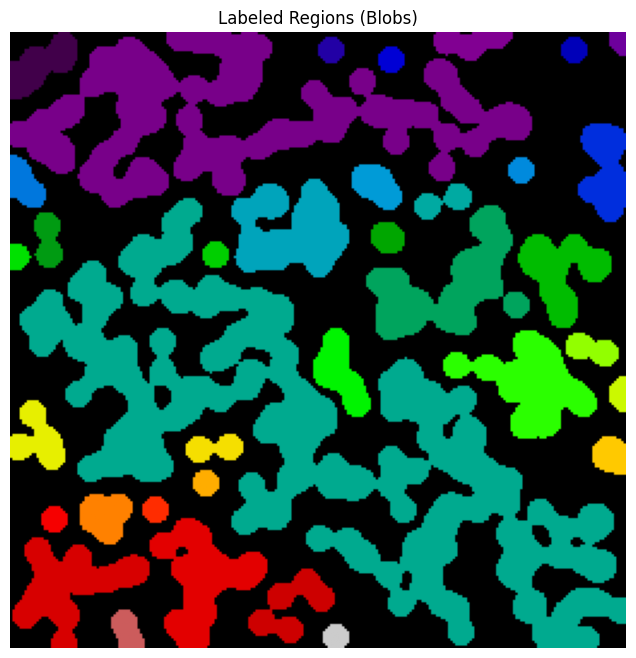

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, measure, feature
from skimage import filters

# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

# Label connected regions (blobs) in the image
labeled_image = measure.label(image)

# Initialize an empty list to store texture features for each blob
blob_properties = []

# Loop through each labeled region (blob)
for region in measure.regionprops(labeled_image):
    # Get the label of the current region (blob)
    label = region.label

    # Extract the binary mask of the current blob
    blob_mask = labeled_image == label

    # Calculate the GLCM for the blob (use the mask to extract just the blob's area)
    glcm = feature.graycomatrix(image_int * blob_mask, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extract texture features from GLCM
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = feature.graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]

    # Store the features in the list
    blob_properties.append({
        'label': label,
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation
    })

# Step 4: Convert the list of blob properties into a pandas DataFrame
df_blob_properties = pd.DataFrame(blob_properties)

# Display the DataFrame with texture features for each blob
print(df_blob_properties)

# Optional: Plot the original image with labeled regions
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labeled_image, cmap='nipy_spectral')
ax.set_title("Labeled Regions (Blobs)")
ax.axis('off')
plt.show()
